In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler


df = pd.read_csv("bodyfat.csv")
df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


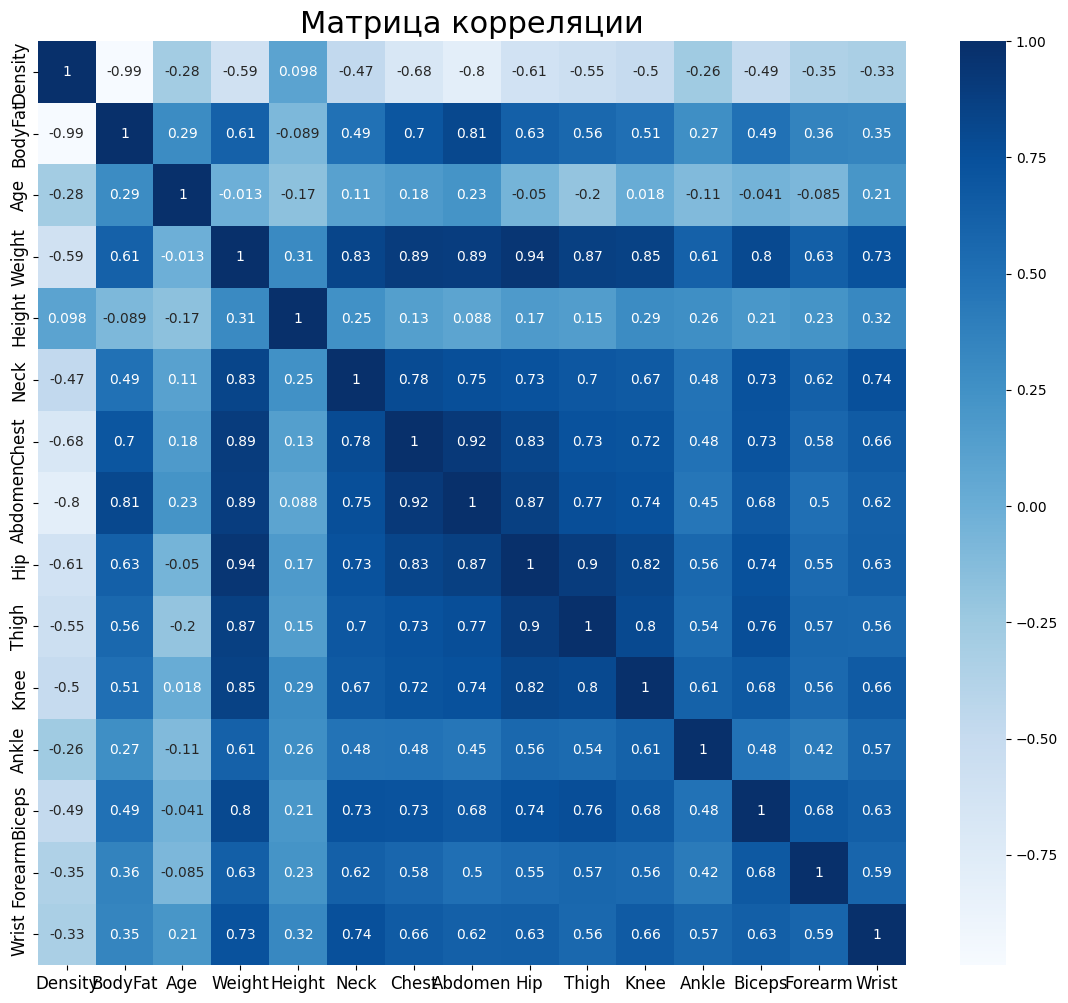

In [ ]:
plt.figure(figsize=(14,12))
a = df.corr(numeric_only=True)
sns.heatmap(a, xticklabels=a.columns, yticklabels=a.columns, cmap='Blues', center=0, annot=True)
plt.title("Матрица корреляции", fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


In [ ]:
df.isna().sum()

,0
Density,0
BodyFat,0
Age,0
Weight,0
Height,0
Neck,0
Chest,0
Abdomen,0
Hip,0
Thigh,0


In [ ]:
X = df[["Density", "Age",   "Weight",   "Height",   "Neck", "Chest",    "Abdomen",  "Hip",  "Thigh",    "Knee", "Ankle",    "Biceps",   "Forearm",  "Wrist"]]
y = df["BodyFat"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

std = StandardScaler()
X_std = std.fit_transform(X_train)
X_std2 = std.transform(X_test)

X_std = pd.DataFrame(X_std, columns=X_train.columns)
X_std2 = pd.DataFrame(X_std2, columns=X_test.columns)

lig_reg = LinearRegression()
lig_reg.fit(X_std, y_train)

w0 = lig_reg.intercept_
w1 = lig_reg.coef_
print(w0, "\n", w1)

19.435820895522383 
 [-7.99759022  0.23570407  0.62162521 -0.06547619 -0.0242391   0.08327757
  0.22743025  0.15358112 -0.12606795 -0.06904289 -0.18688416 -0.1420415
  0.02462331 -0.01001826]


Mean Absolute Error: 0.4595308051303821
Mean Squared Error: 0.38031220947724453
R2 score: 0.9918244198502373


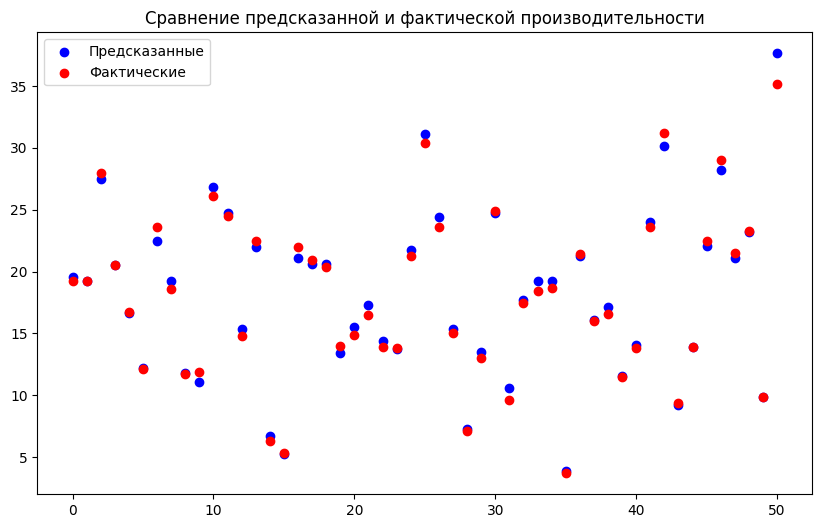

In [ ]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred2))
print('R2 score:', r2_score(y_test, y_pred2))

plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_pred2)), y_pred2, label='Предсказанные', color='blue')
plt.scatter(range(len(y_test)), y_test, label='Фактические', color='red')
plt.title('Сравнение предсказанной и фактической производительности')
plt.legend()
plt.show()
